### CIS 9 - Lab 3a

Supervised Learning: Regression and Classification

In [ ]:
# Name: Shamita Goyal

There are 2 parts to this lab, each part works with a different input file and solves a different type of ML problem. 

In [354]:
# import modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model as lm
directory = "/Users/shamitagoyal/Desktop/data_science_files/data_files/module3inputfiles/"

#### Part 1

You're asked by a bank to create and train an ML model to predict whether a customer will accept an offer for a new credit card from the bank.

One of the primary ways that a bank makes money is through interest from credit card accounts, so the bank would like to know which customers would be more likely to accept a credit card offer, given their banking status.

The input fle is `cc.csv` ([source](https://www.kaggle.com/datasets/thedevastator/unlocking-credit-card-offer-acceptance-trends-in?select=creditcardmarketing-bbm.csv))

1. Read and inspect data

1a. __Read data from `cc.csv` into a DataFrame__.<br>
Then __print the number of rows and columns of the DataFrame__<br>
and __print the first 5 rows__.<br>

In [389]:
cc_df = pd.read_csv(directory + "cc.csv")
print(f"The data frame has {cc_df.shape[0]} rows and {cc_df.shape[1]} columns.")
display(cc_df.head())

The data frame has 18000 rows and 18 columns.


,index,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


1b. The `Offer Accepted` value of 'Yes' is of interest to the bank.<br> 
__Show the number of 'Yes' and 'No' in the `Offer Accepted` column__.

In [390]:
print(cc_df["Offer Accepted"].value_counts())

Offer Accepted
No     16977
Yes     1023
Name: count, dtype: int64


2. Data Cleaning

2a. __Show the number of NaNs__ in each column, and __drop any rows with NaN__.<br>
Then __print the number of rows and columns of the DataFrame__ to confirm that there are still a majority of data available.

In [391]:
print(cc_df.isna().sum())
cc_df = cc_df.dropna()
print(f"The cleaned data frame without NaNs now has {cc_df.shape[0]} rows and {cc_df.shape[1]} columns.")

index                    0
Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64
The cleaned data frame without NaNs now has 17976 rows and 18 columns.


2b. It looks like the `Average Balance` column is the average of the `Q1, Q2, Q3, Q4 Balances`.<br>
Write code to __confirm that the `Average Balance` is the same as the average of the last 4 balance columns__.

_You should not have to use a loop to check. Instead, think of how pandas (numpy) checks for the count of boolean results_.

In [392]:
cc_df = cc_df.fillna(0)
Avg_b = cc_df[['Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']].mean(axis=1)

if (cc_df["Average Balance"] == Avg_b).all():
    print("Average Balance column is the same as the average of Q1, Q2, Q3, and Q4 balances.")

Average Balance column is the same as the average of Q1, Q2, Q3, and Q4 balances.


2c. Since the `Average Balance` is representative of the 4 quarter balances, __remove the `Q1, Q2, Q3, Q4 Balances`__.<br>
Also __remove any additional columns that will not be helpful to the ML model__.<br>
Then __print the first 5 rows of the DataFrame__.

In [393]:
cc_df_cleaned = cc_df.drop(cc_df.columns[-4:], axis=1, inplace=False)
cc_df_cleaned.drop(columns=["index", "Customer Number"], inplace=True)
cc_df_cleaned.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00


2d. Create a Raw NBConvert cell to __explain why you removed the additional columns__ of step 2c.

3. Data Preparation

3a. __Change all the "Yes" strings to the number 1, and all the "No" strings to the number 0__ in the DataFrame.

In [394]:
string_to_num = {"Yes":1, "No":0}
cc_df_cleaned.replace(string_to_num, inplace=True)
display(cc_df_cleaned.head())

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,0,Air Miles,Letter,High,1,0,High,2,1,4,0,1160.75
1,0,Air Miles,Letter,Medium,1,0,Medium,2,2,5,1,147.25
2,0,Air Miles,Postcard,High,2,0,Medium,2,1,2,1,276.50
3,0,Air Miles,Letter,Medium,2,0,High,1,1,4,0,1219.00
4,0,Air Miles,Letter,Medium,1,0,Medium,2,1,6,1,1211.00


3b. __Print all the unique values of `Income Level` and of `Credit Rating`__ to confirm that both columns use the 3 values: Low, Medium, High.<br>
Then __change "Low" to 0, "Medium" to 1, and "High" to 2__ in the DataFrame<br>
and __print the first 5 rows__ to check your result.

In [395]:
print("Income level unique values:", cc_df_cleaned["Income Level"].unique(), "\nCredit rating unique values:", cc_df_cleaned["Credit Rating"].unique())
values = {"Low":0, "Medium":1, "High":2}
cc_df_cleaned.replace(values, inplace=True)
display(cc_df_cleaned.head())

Income level unique values: ['High' 'Medium' 'Low'] 
Credit rating unique values: ['High' 'Medium' 'Low']


,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,0,Air Miles,Letter,2,1,0,2,2,1,4,0,1160.75
1,0,Air Miles,Letter,1,1,0,1,2,2,5,1,147.25
2,0,Air Miles,Postcard,2,2,0,1,2,1,2,1,276.50
3,0,Air Miles,Letter,1,2,0,2,1,1,4,0,1219.00
4,0,Air Miles,Letter,1,1,0,1,2,1,6,1,1211.00


3c. __Change values of `Reward` and `Mailer Type` to numbers__<br>
then __print the first 5 rows of the DataFrame__.

In [396]:
print("Reward unique values:", cc_df_cleaned["Reward"].unique(), "\nMailer Type unique values:", cc_df_cleaned["Mailer Type"].unique())

reward = {"Air Miles":0, "Cash Back":1, "Points":2}
mail_type = {"Letter":0, "Postcard":1}

cc_df_cleaned.replace(reward,inplace=True)
cc_df_cleaned.replace(mail_type,inplace=True)

display(cc_df_cleaned.head())

Reward unique values: ['Air Miles' 'Cash Back' 'Points'] 
Mailer Type unique values: ['Letter' 'Postcard']


,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,0,0,0,2,1,0,2,2,1,4,0,1160.75
1,0,0,0,1,1,0,1,2,2,5,1,147.25
2,0,0,1,2,2,0,1,2,1,2,1,276.50
3,0,0,0,1,2,0,2,1,1,4,0,1219.00
4,0,0,0,1,1,0,1,2,1,6,1,1211.00


3d. __Print the data type of each column__ to confirm that all values in the DataFrame is a number.

In [397]:
cc_df_cleaned.dtypes

Offer Accepted            int64
Reward                    int64
Mailer Type               int64
Income Level              int64
# Bank Accounts Open      int64
Overdraft Protection      int64
Credit Rating             int64
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home             int64
Average Balance         float64
dtype: object

4. Data Analysis

4a. Create a plot with 12 subplots to __show the distribution of each feature__ (column).<br>
The plot should be 2 rows of 6 subplots each, and each subplot should have a title to specify which distribution is shown.

_You should use a loop to create the 12 subplots, don't copy-paste code 12 times_

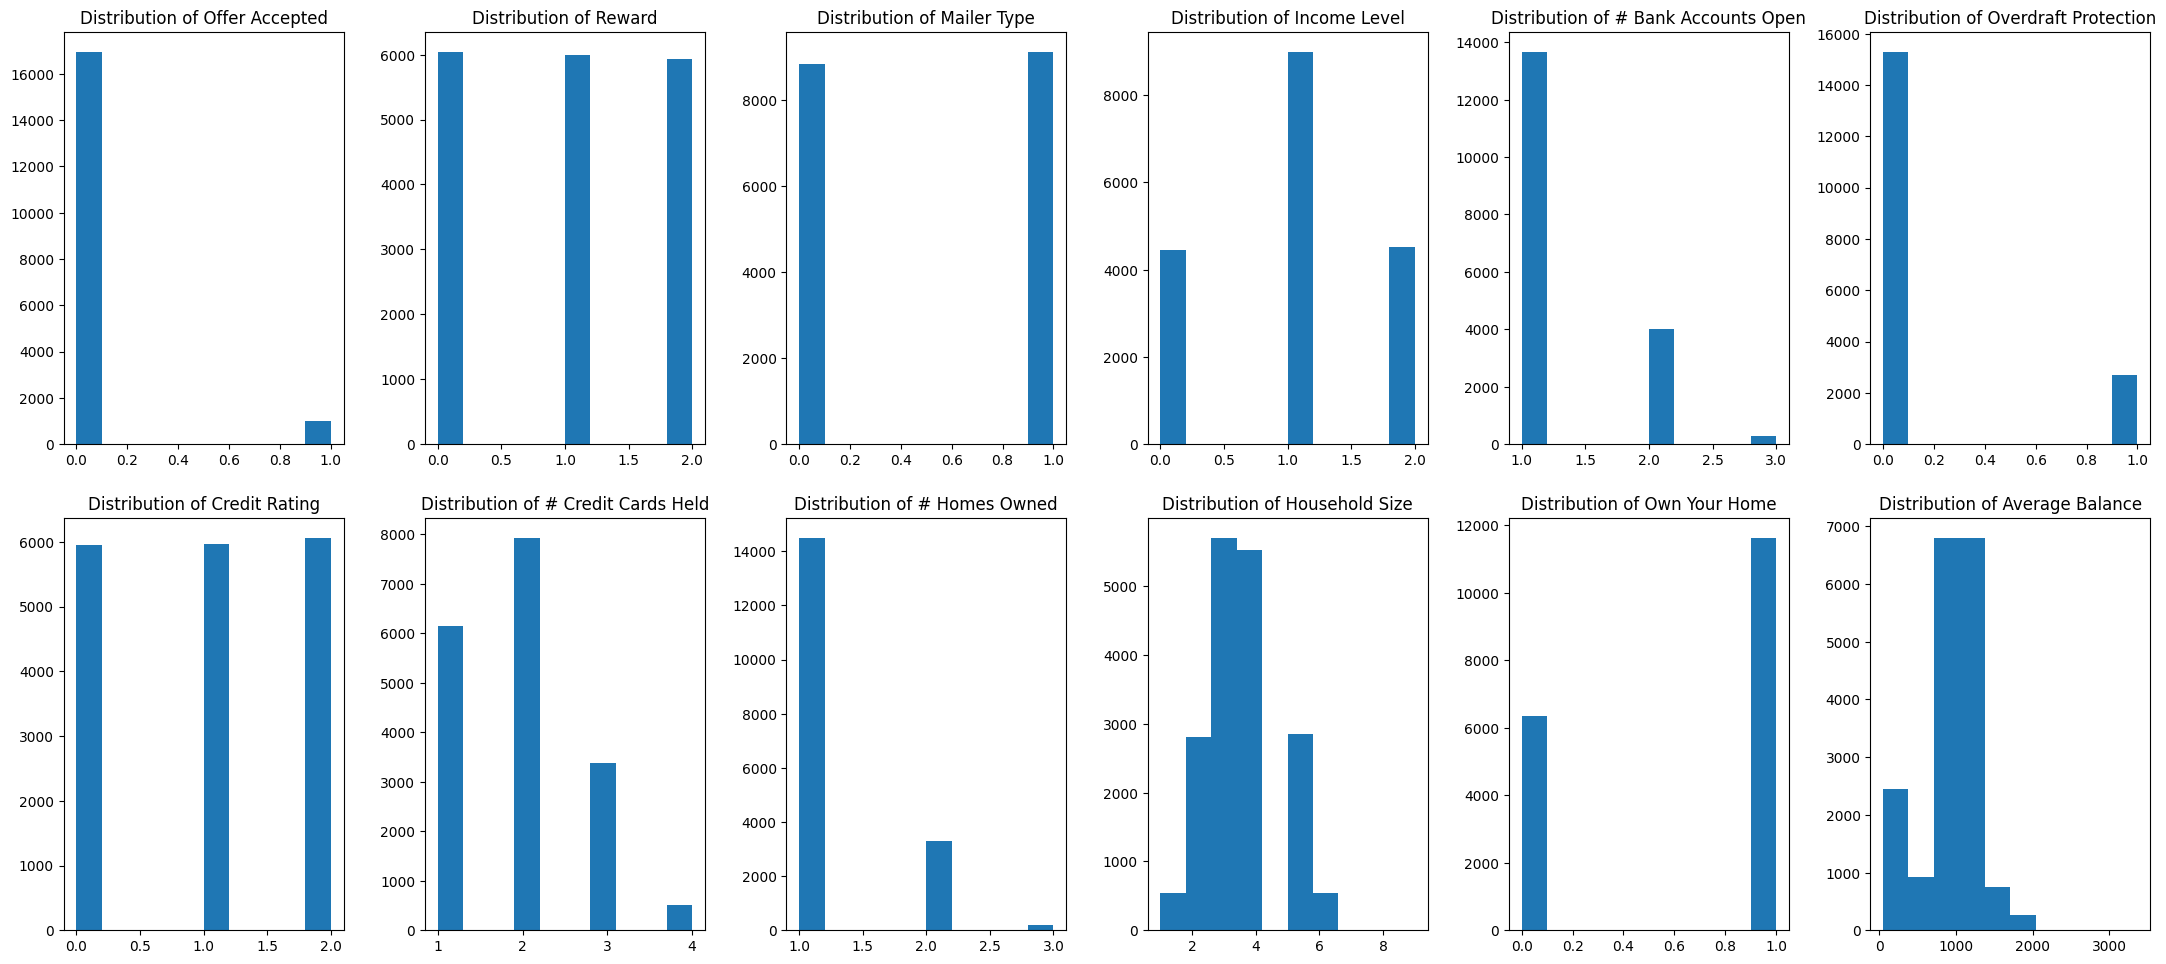

In [398]:
fig, axes = plt.subplots(2, 6, figsize=(22, 10))


axes = axes.flatten()
for i, (col, ax) in enumerate(zip(cc_df_cleaned.columns, axes), 1):
    ax.hist(cc_df_cleaned[col])
    ax.set_title(f"Distribution of {col}")

# to adjust the plot
plt.tight_layout(pad=2.0) 

plt.show()

4c. Create a Raw NBConvert cell to __explain whether there are outliers or anything unusual__ in any of the features.

5. Create training and testing datasets

5a. __Create the X and y datasets__<br>
and __show the number of rows and columns of each dataset__.

In [399]:
X = cc_df_cleaned.drop(columns=["Offer Accepted"], inplace=False)
y = cc_df_cleaned["Offer Accepted"]

print(f"The features has {X.shape[0]} rows and {X.shape[1]} column(s).")
print(f"The labels has {y.shape[0]} rows and {y.shape[1] if len(y.shape) > 1 else 1} column(s).")

The features has 17976 rows and 11 column(s).
The labels has 17976 rows and 1 column(s).


5b. __Create the training and testing sets__ and __show their dimensions__.

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12583, 11) (5393, 11) (12583,) (5393,)


6. Train and measure the accuracy of appropriate ML models. <br>

__Create, train, test, and evaluate the accuracy of _all_ the appropriate machine learning models__ that we've discussed in class to predict the customer response.<br>

- It's a good idea to create one or more Code cells for _each_ type of machine learning model.<br>
(Don't have one huge Code cell that has all the models, it makes debugging more difficult)
- For each model, make sure to show all the accuracy measurements that we've discussed in class for the model.<br>
_(Hint: there is more than one measurement)_

In [401]:
# 1) DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
print("DecisionTreeClassifier\n")

#1. train
regr = DecisionTreeClassifier()
regr = regr.fit(X_train, y_train)

#2. test

#accuracy_score method
y_pred = regr.predict(X_test)
print("accuracy_score method:", metrics.accuracy_score(y_test, y_pred))

#confusion matrix method
print("Confusion matrix method:\n", metrics.confusion_matrix(y_test, y_pred))

#f1 score method
print(f"f1 score method: {f1_score(y_test, y_output, average='weighted'):.3f}")

DecisionTreeClassifier

accuracy_score method: 0.8863341368440572
Confusion matrix method:
 [[4742  326]
 [ 287   38]]
f1 score method: 0.911


accuracry n=1: 0.896347116632672
accuracry n=2: 0.9362136102354904
accuracry n=3: 0.931021694789542
accuracry n=4: 0.9389949935101057
accuracry n=5: 0.9380678657519006
accuracry n=6: 0.9397366957166697
accuracry n=7: 0.9397366957166697
accuracry n=8: 0.9397366957166697
accuracry n=9: 0.9397366957166697
accuracry n=10: 0.9397366957166697
accuracry n=11: 0.9397366957166697
accuracry n=12: 0.9397366957166697
accuracry n=13: 0.9397366957166697
accuracry n=14: 0.9397366957166697


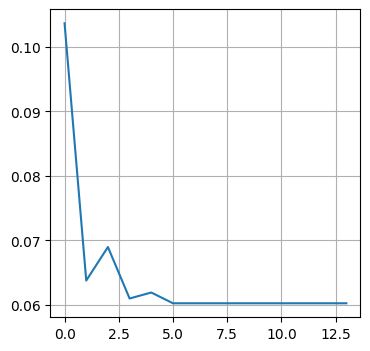

In [402]:
# 2) KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# 1. checking for the best n_neighbors to use
errors = []
for i in np.arange(1, 15):
    c = KNeighborsClassifier(n_neighbors = i)
    c.fit(X_train, y_train)
    y_pred = c.predict(X_test)
    print(f"accuracry n={i}:", metrics.accuracy_score(y_test, y_pred))
    errors.append(np.mean(y_pred != y_test))
    
# see what the error rate looks like
plt.figure(figsize=(4,4))
plt.grid(True)
plt.plot(errors)

# n=4 is our n_neighbors based off of our accurary score test

In [403]:
# 2. train
regr = KNeighborsClassifier()
regr = regr.fit(X_train, y_train)
classifier = KNeighborsClassifier(n_neighbors=4)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#3. test

print("KNeighborsClassifier\n")
#accuracy_score method
y_pred = regr.predict(X_test)
print("Accuracy_score method:", metrics.accuracy_score(y_test, y_pred))

#confusion matrix method
print("Confusion matrix method:\n", metrics.confusion_matrix(y_test, y_pred))

#f1 score method
print(f"f1 score method: {f1_score(y_test, y_output, average='weighted'):.3f}")

KNeighborsClassifier

Accuracy_score method: 0.9380678657519006
Confusion matrix method:
 [[5058   10]
 [ 324    1]]
f1 score method: 0.911


In [404]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB


# 1. train
regr = GaussianNB()
regr = regr.fit(X_train, y_train)
model = GaussianNB()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#2. test
print("GaussianNB\n")
#accuracy_score method
y_pred = regr.predict(X_test)
print("accuracy_score method:", metrics.accuracy_score(y_test, y_pred))

#confusion matrix method
print("Confusion matrix method:\n", metrics.confusion_matrix(y_test, y_pred))

#f1 score method
print(f"f1 score method: {f1_score(y_test, y_output, average='weighted'):.3f}")

GaussianNB

accuracy_score method: 0.9397366957166697
Confusion matrix method:
 [[5068    0]
 [ 325    0]]
f1 score method: 0.911


7. Based on the accuracy measurements, what would you recommend to the bank?<br>
Create a Raw NBConvert to show your recommendation.

---

#### Part 2

Create and train an ML model to predict the price of a house, given some common features of the house.<br>
The input file is `house.csv` ([source](https://www.kaggle.com/datasets/praveenobulreddy/usa-housing-dataset)).

1. Read and inspect data

1a. __Read data from `house.csv` into a DataFrame__.<br>
Then __print the number of rows and columns of the DataFrame__<br>
and __print the first 5 rows__.

In [407]:
house_df = pd.read_csv(directory + "house.csv")
print(f"The data frame has {house_df.shape[0]} rows and {house_df.shape[1]} columns.")
display(house_df.head())

The data frame has 5000 rows and 7 columns.


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


1b. __Remove any unnecessary columns__.

In [408]:
house_df_cleaned = house_df.drop(columns=["Address"])
house_df_cleaned

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


1c. __Check for NaNs and drop rows with NaNs__.

In [409]:
print(house_df_cleaned.isna().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64


2. Data Cleaning

__Shorten the column headers to the last word__ only.<br>
For example, "Avg. Area Income" becomes "Income"<br>
Then __show the first 5 rows of the DataFrame__.

In [410]:
house_df_cleaned.columns = house_df_cleaned.columns.str.extract(r"([A-Za-z]+)$", expand=False)
house_df_cleaned.head()

,Income,Age,Rooms,Bedrooms,Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


3. Data Analysis

3a. __Plot the distribution of the Price__ column<br>
The plot should have a title.

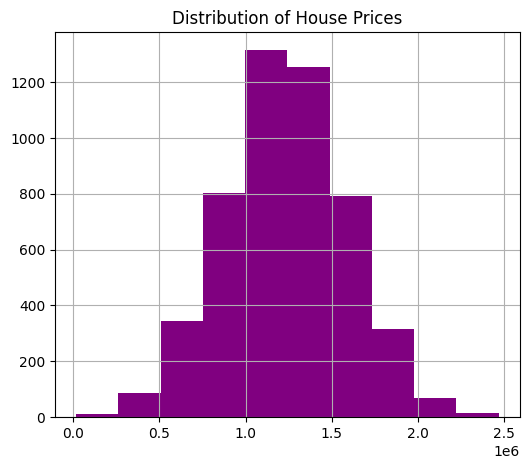

In [411]:
plt.figure(figsize=(6, 5))
plt.hist(house_df_cleaned["Price"], color="purple")
plt.title("Distribution of House Prices")
plt.grid()

3b. Create a Raw NBConvert cell to __explain whether the data is balanced__, based on the plot.

3c. Create a plot with 5 subplots to __show any correlation between each feature and the price__.<br>
The plot should be in 2 rows of 2-3 subplots each, and each subplot should have a title to specify which distribution is shown.

_You should use a loop to create the subplots._

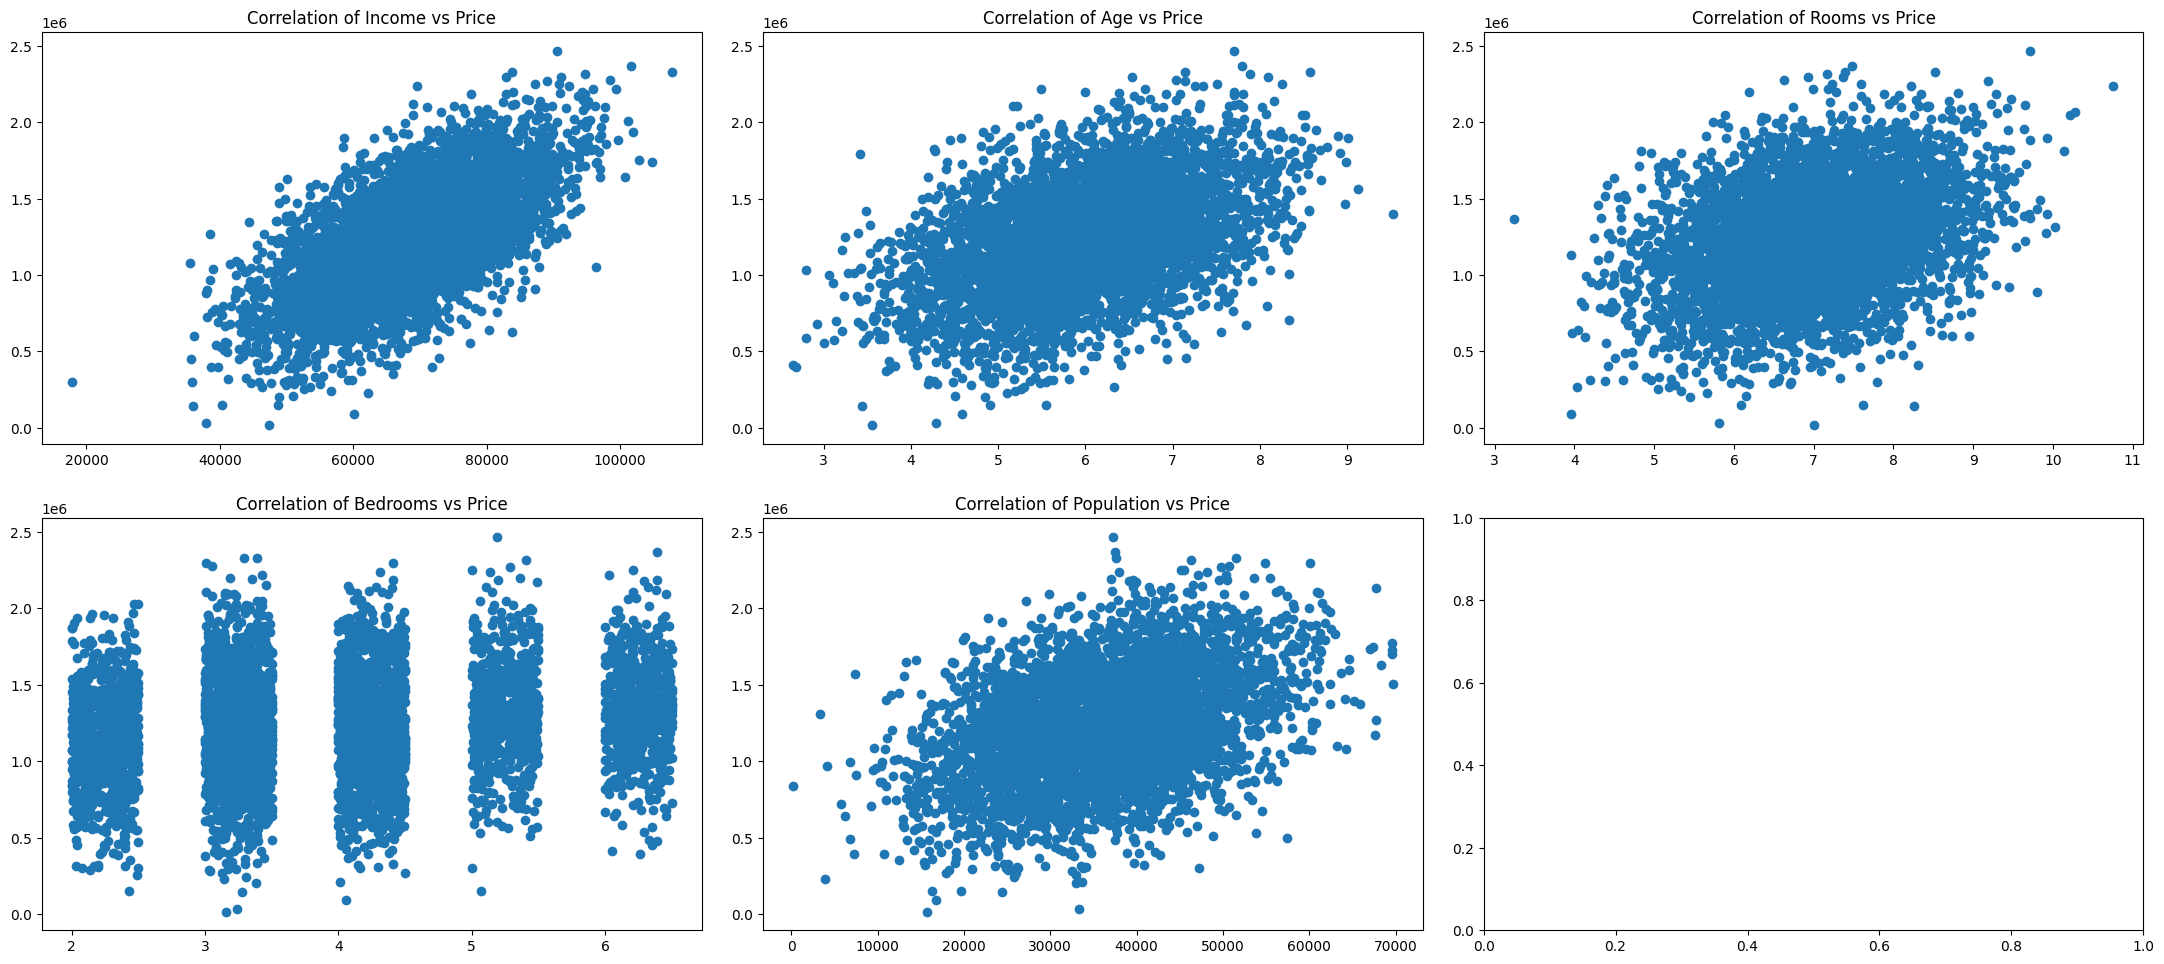

In [412]:
fig, axes = plt.subplots(2,3, figsize=(22, 10))

axes = axes.flatten()
for i, (col, ax) in enumerate(zip(house_df_cleaned.columns[:-1], axes), 1):
    ax.scatter(house_df_cleaned[col], house_df_cleaned["Price"])
    ax.set_title(f"Correlation of {col} vs Price")

plt.tight_layout(pad=2.0) 
plt.show()

3d. Is there any correlation between the features and the price?<br>
Create a Raw NBConvert to __explain any correlation__.

4.Create training and testing datasets

4a. __Create the X and y datasets__<br>
and __show the number of rows and columns of each dataset__.

In [413]:
import sklearn.linear_model as lm

regr = lm.LinearRegression()
X = house_df_cleaned.drop(columns=['Price'])
y = house_df_cleaned["Price"]

4b. __Create the training and testing sets__ and __show their dimensions__.

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3750, 5) (1250, 5) (3750,) (1250,)


5. Train and measure accuracy of appropriate ML models. <br>

__Create, train, test, and evaluate the accuracy of _all_ the appropriate machine learning models__ that we've discussed in class to predict the customer response.<br>

- It's a good idea to create one or more Code cells for _each_ type of machine learning model.<br>
(Don't have one huge Code cell that has all the models, it makes debugging more difficult)
- For each model, make sure to show all the accuracy measurements that we've discussed in class for the model.<br>
_(Hint: there is more than one measurement)_

In [415]:
#LinearRegression

regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)

coeff = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])
display(coeff)

y_pred = regr.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
priceMean = np.mean(y)

print("Linear Regression\n")
print('Root Mean Squared Error:',round(RMSE,2),"or",round(RMSE/priceMean*100),"percent error")
print('R^2 value:', round(regr.score(X,y),2))

,Coefficient
Income,21.380183
Age,165975.917564
Rooms,122986.324566
Bedrooms,60.325813
Population,15.221711


Linear Regression

Root Mean Squared Error: 102036.98 or 8 percent error
R^2 value: 0.92


In [416]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor()
regr = regr.fit(X_train, y_train)

features = pd.DataFrame(regr.feature_importances_, X.columns, columns=['Importance'])
display(features)

y_pred = regr.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
priceMean = np.mean(y)

print("DecisionTreeRegressor\n")
print('Root Mean Squared Error:',round(RMSE,2),"or",round(RMSE/priceMean*100),"percent error")
print('R^2 value:', round(regr.score(X,y),2))

,Importance
Income,0.426603
Age,0.236251
Rooms,0.130115
Bedrooms,0.014770
Population,0.192260


DecisionTreeRegressor

Root Mean Squared Error: 176415.65 or 14 percent error
R^2 value: 0.94


6. For the models that you used, do they have the same list of important features?
Create a Raw NBConvert cell to __compare the lists of important features__.

In [417]:
df = pd.concat([coeff, features], axis=1)
df

,Coefficient,Importance
Income,21.380183,0.426603
Age,165975.917564,0.236251
Rooms,122986.324566,0.130115
Bedrooms,60.325813,0.014770
Population,15.221711,0.192260
